# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [2]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


#### Génération de donnée synthétiques...

In [20]:

np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnees test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


#### Régression linéaire avec régularisation Lasso ...


In [4]:

from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


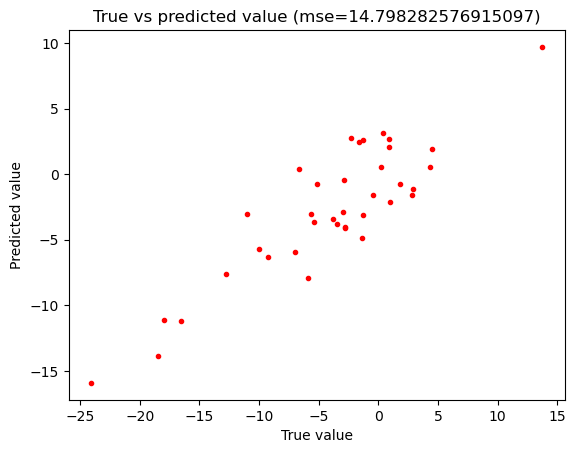

In [5]:
fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()



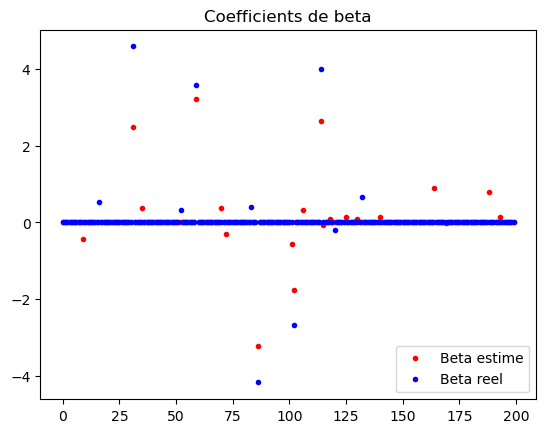

In [6]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()



### <span style="color:blue">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:blue">REPONSE 1</span> :



### <span style="color:blue">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisee de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:blue">REPONSE 2</span> :

In [21]:

from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV

# Définir les valeurs d'alpha à tester sur une échelle exponentielle large
alphas = np.logspace(-3, 2, 100)

kf = KFold(n_splits=8, shuffle=True, random_state=42)

lasso_regressor_kf = LassoCV(alphas=alphas, cv=kf, random_state=42)
lasso_regressor_kf.fit(X_train, y_train)

y_pred_lasso_kf = lasso_regressor_kf.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso_kf)

# Afficher le meilleur alpha trouvé
print(f"Meilleur alpha: {lasso_regressor_kf.alpha_}")

# Afficher la MSE moyenne pour chaque alpha testé
mse_per_alpha = lasso_regressor_kf.mse_path_.mean(axis=1)  # MSE pour chaque alpha à travers les folds
for i, alpha in enumerate(lasso_regressor_kf.alphas_):
    print(f"Alpha: {alpha}, MSE moyenne: {mse_per_alpha[i]}")



Meilleur alpha: 0.26560877829466867
Alpha: 100.0, MSE moyenne: 66.6915291696225
Alpha: 89.02150854450393, MSE moyenne: 66.6915291696225
Alpha: 79.24828983539169, MSE moyenne: 66.6915291696225
Alpha: 70.54802310718645, MSE moyenne: 66.6915291696225
Alpha: 62.80291441834247, MSE moyenne: 66.6915291696225
Alpha: 55.90810182512222, MSE moyenne: 66.6915291696225
Alpha: 49.770235643321136, MSE moyenne: 66.6915291696225
Alpha: 44.30621457583877, MSE moyenne: 66.6915291696225
Alpha: 39.442060594376564, MSE moyenne: 66.6915291696225
Alpha: 35.11191734215127, MSE moyenne: 66.6915291696225
Alpha: 31.25715849688235, MSE moyenne: 66.6915291696225
Alpha: 27.825594022071257, MSE moyenne: 66.6915291696225
Alpha: 24.77076355991709, MSE moyenne: 66.6915291696225
Alpha: 22.051307399030456, MSE moyenne: 66.6915291696225
Alpha: 19.630406500402724, MSE moyenne: 66.6915291696225
Alpha: 17.47528400007683, MSE moyenne: 66.6915291696225
Alpha: 15.556761439304722, MSE moyenne: 66.6915291696225
Alpha: 13.84886371

In [22]:
lasso_regressor_kf.alpha_

np.float64(0.26560877829466867)

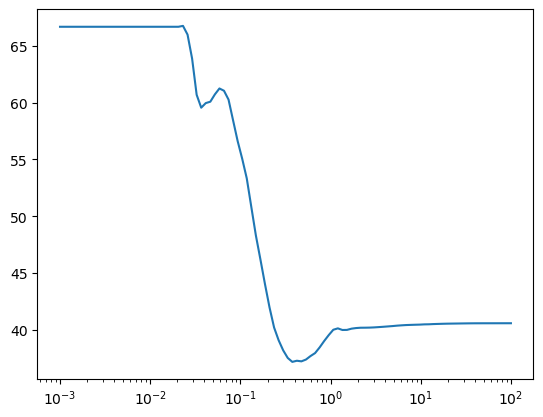

In [23]:
fig = plt.figure()
plt.semilogx(alphas, mse_per_alpha)

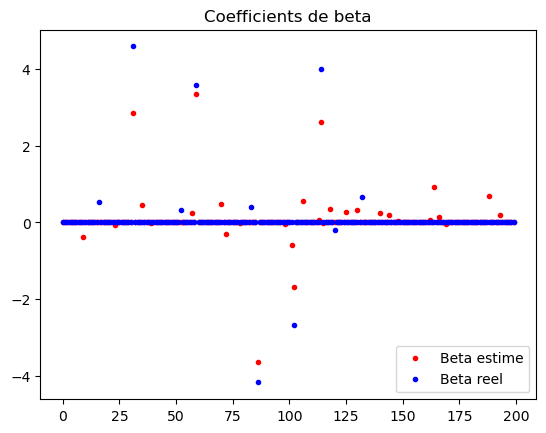

In [128]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

fig = plt.figure()
plt.plot(lasso_regressor_kf.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:blue">REPONSE 3</span> :


In [ ]:


from sklearn.linear_model import LinearRegression

#...

